In [7]:
import os
if not os.path.isfile('libhampath/hampathcode.py'):
    !hampath -python

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from libhampath.hampathcode import *
from libhampath.control_p import *

In [9]:
t0      = 0.0                              # Initial time
tf      = 1.0                              # Final time
q0      = np.array([-1.0,0.0])             # Initial state
n       = len(q0)                          # State dimension
yGuess  = np.array([0.1,0.1])              # Initial guess for the shooting metdhod: yGuess = [px(0) pv(0)]
par     = np.array([t0, tf, q0[0], q0[1], 0.0, 0.0, 0.0])  # t0, tf, x_0, v_0, x_f, v_f, lambda_0
npar    = len(par)
par0    = par                              # par_0
parf    = np.array(par); parf[-1] = 1.0    # par_f with lambda_f = 1.0: for homotopy on lambda
options = HampathOptions()                 # Hampath options

In [10]:
[y0,ssol,nfev,njev,flag] = ssolve(yGuess,options,par0)


     Calls  |S(y)|                 |y|

         0  0.967958906382107E+00  0.141421356237310E+00
         1  0.361462428790642E-14  0.134164078649987E+02
         2  0.315779905631428E-14  0.134164078649987E+02
         3  0.590091631821035E-14  0.134164078649987E+02
         4  0.899828741205516E-14  0.134164078649987E+02
         5  0.361462428790642E-14  0.134164078649987E+02
         6  0.611832617168011E-14  0.134164078649987E+02
         7  0.741110251757543E-14  0.134164078649987E+02
         8  0.535790456979763E-14  0.134164078649987E+02
         9  0.711929161928699E-14  0.134164078649987E+02
        10  0.537054250957417E-14  0.134164078649987E+02
        11  0.803129534716921E-14  0.134164078649987E+02
        12  0.356829203518054E-14  0.134164078649987E+02
        13  0.361462428790642E-14  0.134164078649987E+02
        14  0.232977596905503E-13  0.134164078649987E+02
        15  0.361462428790642E-14  0.134164078649987E+02
        16  0.225230296777251E-13  0.1341640786


  Homotopic param.   Arclength s     det(s)          |S(y,lambda)|   Inner product   |y|
 
  0.00000000000E+00  0.00000000E+00 -0.83341135E-01  0.71374476E-14  0.00000000E+00  0.13416407865E+02
  0.17279852851E-02  0.17280300E-02 -0.83342019E-01  0.58324354E-14  0.99998862E+00  0.13416419544E+02
  0.28045801880E-02  0.28048186E-02 -0.83356208E-01  0.51178753E-15  0.99996018E+00  0.13416438623E+02
  0.87007389168E-02  0.87082677E-02 -0.83553216E-01  0.22142932E-13  0.99881086E+00  0.13416703862E+02
  0.16189762747E-01  0.16238252E-01 -0.84092301E-01  0.18545971E-14  0.99811393E+00  0.13417432686E+02
  0.26245151669E-01  0.26450868E-01 -0.85314115E-01  0.12044174E-14  0.99673493E+00  0.13419101002E+02
  0.37894946869E-01  0.38509606E-01 -0.87414611E-01  0.54271018E-14  0.99593901E+00  0.13422022387E+02
  0.51615573284E-01  0.53150471E-01 -0.90766893E-01  0.79476004E-15  0.99501373E+00  0.13426823738E+02
  0.68631224634E-01  0.72172549E-01 -0.96106586E-01  0.11893090E-14  0.99363563E+00 

Text(0.5, 1.0, 'Control')

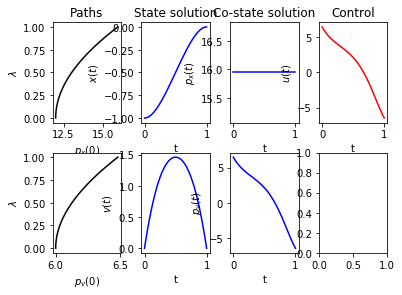

In [5]:
parspan = np.zeros((npar,2))
parspan[:,0] = par0
parspan[:,1] = parf

[ parout, yout, sout, viout, dets, normS, ps, flag ] = hampath(parspan,y0,options)

lout = parout[-1,:]
p0f  = yout[:,-1]
parf = parout[:,-1]

# Figures
fig, axarr = plt.subplots(nrows=2, ncols=4)
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

left    = 0.125 # the left side of the subplots of the figure
right   = 0.9   # the right side of the subplots of the figure
bottom  = 0.1   # the bottom of the subplots of the figure
top     = 0.9   # the top of the subplots of the figure
wspace  = 0.3   # the amount of width reserved for blank space between subplots
hspace  = 0.3   # the amount of height reserved for white space between subplots

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

# Paths
lig,col = 0,0
axarr[lig,col].plot(yout[0,:],lout,'k')
axarr[lig,col].set_xlabel('$p_x(0)$')
axarr[lig,col].set_ylabel('$\lambda$')
axarr[lig,col].set_title('Paths')

lig,col = 1,0
axarr[lig,col].plot(yout[1,:],lout,'k')
axarr[lig,col].set_xlabel('$p_v(0)$')
axarr[lig,col].set_ylabel('$\lambda$')

# Solution
z0          = np.zeros((2*n,))
z0[0:n]     = q0
z0[n:2*n]   = p0f
[ tout, z, flag ] = exphvfun(np.array([t0, tf]), z0, options, parf)

lig,col = 0,1
axarr[lig,col].plot(tout,z[0,:],'b')
axarr[lig,col].set_xlabel('t')
axarr[lig,col].set_ylabel('$x(t)$')
axarr[lig,col].set_title('State solution')

lig,col = 0,2
axarr[lig,col].plot(tout,z[2,:],'b')
axarr[lig,col].set_xlabel('t')
axarr[lig,col].set_ylabel('$p_x(t)$')
axarr[lig,col].set_title('Co-state solution')

lig,col = 1,1
axarr[lig,col].plot(tout,z[1,:],'b')
axarr[lig,col].set_xlabel('t')
axarr[lig,col].set_ylabel('$v(t)$')

lig,col = 1,2
axarr[lig,col].plot(tout,z[3,:],'b')
axarr[lig,col].set_xlabel('t')
axarr[lig,col].set_ylabel('$p_v(t)$')

# Control
u   = control(tout,z,parf)
lig,col = 0,3
axarr[lig,col].plot(tout,u[0,:],'r')
axarr[lig,col].set_xlabel('t')
axarr[lig,col].set_ylabel('$u(t)$')
axarr[lig,col].set_title('Control')

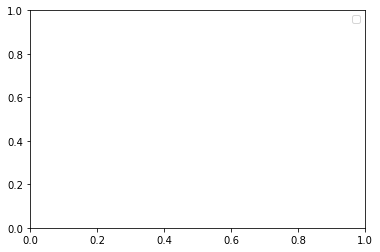

In [6]:
k = n # regular case, k = n : fixed tf
dz0 = np.zeros((2*n,n))
dz0[n:2*n,:] = np.eye(n)

[ tout, z, dz, flag ] = expdhvfun(np.array([t0, tf]), z0, dz0, options, parf)

nt  = len(tout)
sv  = np.zeros(nt,)
de  = np.zeros(nt,)

for j in range(0,nt):
    dq      = dz[0:n,j*k:(j+1)*k]
    sv[j]   = np.min(np.linalg.svd(dq,compute_uv=0))    # Get smallest singular value
    de[j]   = np.linalg.det(dq)                         # Get determinant

maxsv       = np.max(sv)
lig,col     = 1,3
plt1,       = axarr[lig,col].plot(tout,sv,'m',label='$\sigma_{min}$')
plt2,       = axarr[lig,col].plot(tout,maxsv*np.sign(de),'k--',label='$sign(\det(\delta q))$')
axarr[lig,col].set_xlabel('t')
axarr[lig,col].set_title('Conjugate points')
plt.legend([plt1, plt2])